In [ ]:
from CR3BP import CR3BP
import numpy as np

prop = CR3BP(odemethod="RK45")
# x0 = np.array([8.173732823e-1, 0, 0, 0, 1.914652985644e-1, 0])
# tf = 2.81934851464
# x0 = np.array([0.824293579889, 0, 0.05998471178, 0, 0.17085057273180781, 0])
# tf = 1.9810382309
# x0 = np.array([0.8242936, 0, 0.0599847, 0, 0.17085057, 0])
# tf = 3.1457
# x0 = np.array([-0.105086, 0, 0.9903206, 0, 1.09695196, 0])
# tf = 3.11628

# x0 = np.array([0.8313996, 0, 0.12248709, 0, 0.2370638, 0])
# tf = 	2.784659402929

x0 = np.array([0.93073122691776, 0, 0.2306551858505, 0, 0.10356396251875, 0])
tf = 1.84245395871

In [ ]:
optstate = prop.find_periodic_orbit(
    opt_vars=["tf", "z", "vy"],
    obj_zero=["y", "vx"],
    init_guess=[tf / 2, *x0],
    tol=3e-14,
)
x0half = optstate[1:]
tfhalf = optstate[0]
optstate = prop.find_periodic_orbit(
    opt_vars=["tf", "z", "vy"],
    obj_zero=["y", "vx"],
    init_guess=[2 * tfhalf, *x0half],
    tol=3e-14,
)
x0 = optstate[1:]
tf = optstate[0]

In [ ]:
stab_idx = prop.get_stab_index(x0, tf, 1e-12)

In [ ]:
stm = prop.get_stm(x0, 0, tf, 1e-12)

In [ ]:
vals, vecs = np.linalg.eig(stm)

In [ ]:
vecs[4]

array([ 0.4058801 , -0.50794857,  0.40585713,  0.50813574, -0.04478391,
        0.04623423])

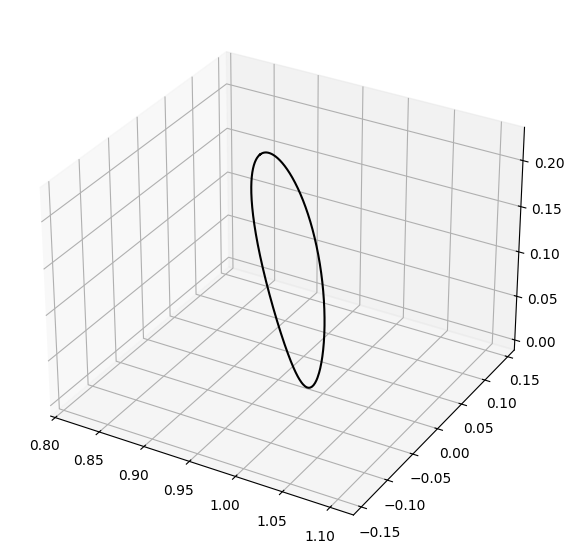

In [ ]:
x0 = optstate[1:]
tf = optstate[0]

xs = prop.propagate(x0, tf, tol=10e-16)
import matplotlib.pyplot as plt

ax = plt.figure(figsize=(7, 7)).add_subplot(projection="3d")
x, y, z, vx, vy, vz = xs.T
plt.plot(x, y, z, "-k")
plt.axis("equal")
plt.show()

In [ ]:
npts = 30
xs_s1, xs_s2, xs_u1, xs_u2 = prop.manifold_curves(
    x0=x0, period=tf, npts=npts, d=1e-3, tol=1e-10, termtime=20
)

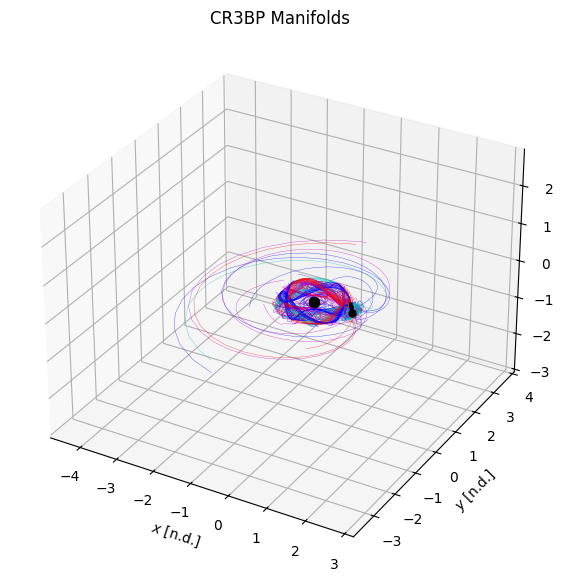

In [ ]:
import matplotlib.pyplot as plt

ax = plt.figure(figsize=(7, 7)).add_subplot(projection="3d")
x, y, z, vx, vy, vz = xs.T
for i in range(npts):
    plt.plot(xs_s1[i][:, 0], xs_s1[i][:, 1], xs_s1[i][:, 2], "-b", lw=0.2)
    plt.plot(xs_s2[i][:, 0], xs_s2[i][:, 1], xs_s2[i][:, 2], "-c", lw=0.2)
    plt.plot(xs_u1[i][:, 0], xs_u1[i][:, 1], xs_u1[i][:, 2], "-r", lw=0.2)
    plt.plot(xs_u2[i][:, 0], xs_u2[i][:, 1], xs_u2[i][:, 2], "-m", lw=0.2)

plt.plot(1 - prop.mu, 0, 0, ".k", ms=10, label="Moon")
plt.plot(-prop.mu, 0, 0, ".k", ms=15, label="Earth")
plt.plot(x, y, z, "-k")
plt.axis("equal")
plt.title("CR3BP Manifolds")
ax.set_xlabel("$x$ [n.d.]")
ax.set_ylabel("$y$ [n.d.]")
ax.set_zlabel("$z$ [n.d.]")
plt.show()